Dataset Preview:
    Experience  Educationlevel  ProjectsHandled  WorkingHours  \
0           7               2                1            11   
1           4               3                9             9   
2          13               2               11             9   
3          11               3               16            10   
4           8               1                7             7   

   PerformanceScore  Salary  Attrition  
0                 2   71311          1  
1                 1  191449          0  
2                 4  252768          0  
3                 3  326490          0  
4                 2  166534          0  


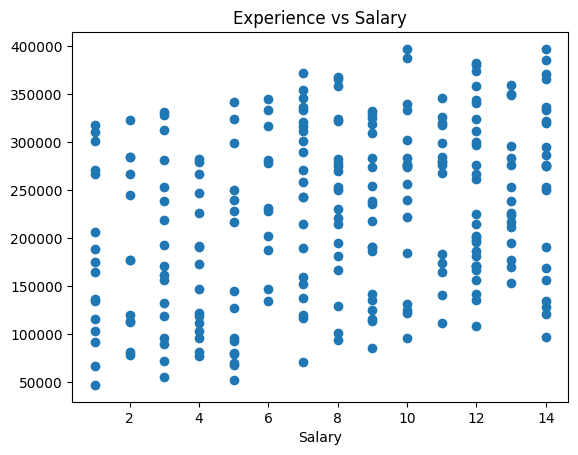

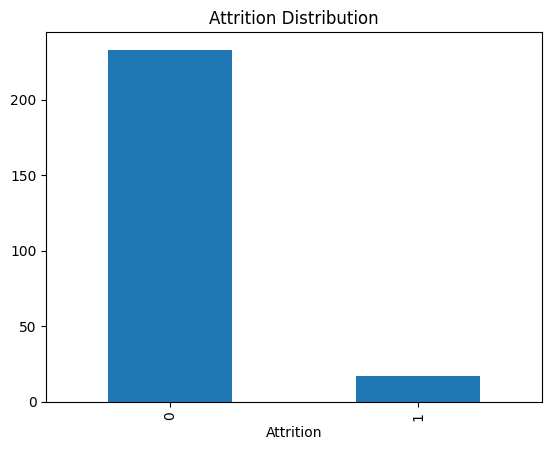

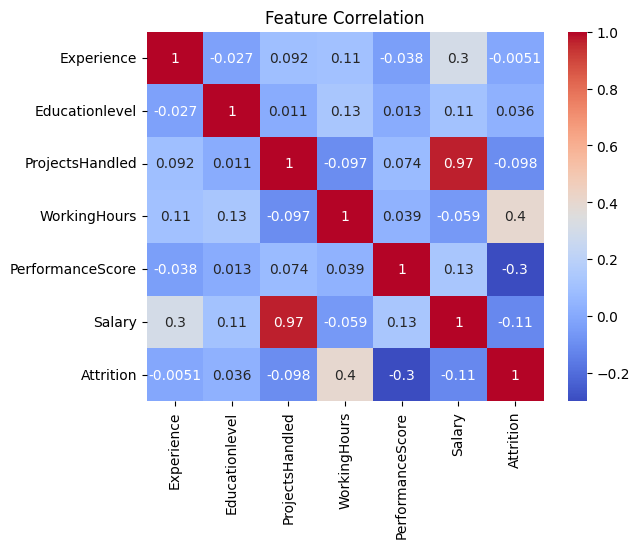


Salary Prediction Results
R2 Score: 0.9948795677860428
RMSE: 6333.423538346531


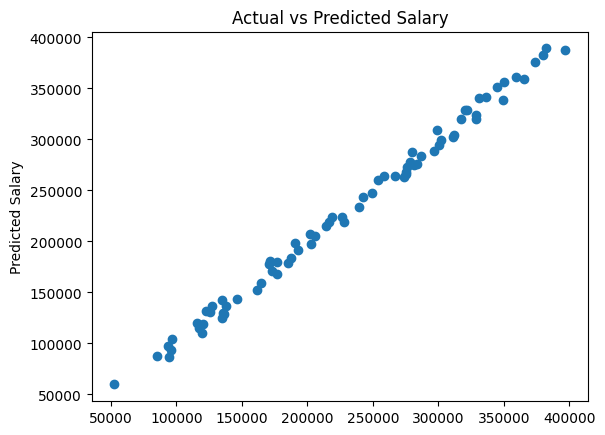


Attrition Prediction Results
Accuracy: 1.0
Confusion Matrix:
 [[68  0]
 [ 0  7]]
Cross Validation Accuracy: 1.0


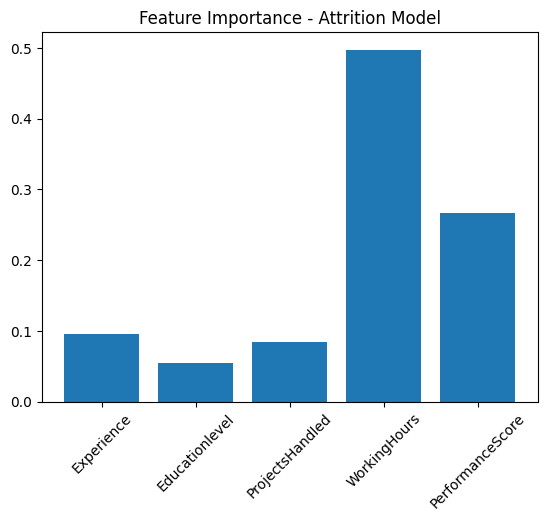


Project Completed Successfully!


In [ ]:
# step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

np.random.seed(42)

# Step 2: Create Synthetic HR Dataset

data = pd.DataFrame({
    "Experience": np.random.randint(1, 15, 250),
    "Educationlevel": np.random.randint(1, 5, 250),
    "ProjectsHandled": np.random.randint(1, 20, 250),
    "WorkingHours": np.random.randint(6, 12, 250),
    "PerformanceScore": np.random.randint(1, 6, 250)

})

#Salary Formula (Regression Target)
data["Salary"] = (
    data["Experience"]  * 5000 +
    data["Educationlevel"] * 8000 +
    data["ProjectsHandled"] * 15000 +
    data["PerformanceScore"] * 4000 +
    np.random.randint(-10000, 10000, 250)
)

# Attrition Formula (Classification Target)
data["Attrition"] = np.where(
    (data["WorkingHours"] > 10) &
    (data["PerformanceScore"] < 3), 1, 0
)

print("Dataset Preview:\n", data.head())

# Step 3: Exploratory Data Analysis

# Plot 1: Experience vs Salary
plt.figure()
plt.scatter(data["Experience"], data["Salary"])
plt.title("Experience vs Salary")
plt.xlabel("Salary")
plt.show()

# Plot 2: Attrition Count
plt.figure()
data["Attrition"].value_counts().plot(kind='bar')
plt.title("Attrition Distribution")
plt.show()

# Plot 3: Correlation Heatmap
plt.figure()
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

#  Step 4: salary Prediction (Regression)

X_reg = data.drop(["Salary", "Attrition"], axis=1)
y_reg = data["Salary"]

X_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reg)
x_test_r_scaled = scaler.transform(x_test_reg)

reg_model = LinearRegression()
reg_model.fit(X_train_scaled, y_train_reg)

y_pred_r = reg_model.predict(x_test_r_scaled)
print("\nSalary Prediction Results")
print("R2 Score:", r2_score(y_test_reg, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_r)))

# Plot 4: Actual vs predicted Salary
plt.figure()
plt.scatter(y_test_reg, y_pred_r)
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.show()

#  Step 5: Attrition Prediction (Classification)

X_clf = data.drop(["Salary", "Attrition"], axis=1)
y_clf = data["Attrition"]


X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # Corrected capitalization
rf_model.fit(X_train_clf, y_train_clf)

y_pred_c = rf_model.predict(X_test_clf)

print("\nAttrition Prediction Results")
print("Accuracy:", accuracy_score(y_test_clf, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_clf, y_pred_c))

# Cross Validation
cv_score = cross_val_score(rf_model, X_clf, y_clf, cv=5)
print("Cross Validation Accuracy:", cv_score.mean())

# Plot 5: Feature Importance
importance = rf_model.feature_importances_
features = X_clf.columns

plt.figure()
plt.bar(features, importance)
plt.xticks(rotation=45)
plt.title("Feature Importance - Attrition Model")
plt.show()

print("\nProject Completed Successfully!")